# ARIEL: Body Decoders

In [1]:
# Third-party libraries
import mujoco as mj
import numpy as np
from rich.console import Console

# Global constants
SEED = 42

# Global functions
console = Console()
RNG = np.random.default_rng(SEED)

## ARIEL Modules

In [2]:
# Local libraries
from ariel.body_phenotypes.robogen_lite.config import (
    NUM_OF_FACES,
    NUM_OF_ROTATIONS,
    NUM_OF_TYPES_OF_MODULES,
)
from ariel.body_phenotypes.robogen_lite.constructor import (
    construct_mjspec_from_graph,
)
from ariel.simulation.environments import SimpleFlatWorld
from ariel.utils.renderers import single_frame_renderer

# System parameters
num_modules = 30
console.log(f"Number of modules: {num_modules}")

[17:57:17] Number of modules: 30                                                                   ]8;id=77533;file:///var/folders/x7/1fxq57_x2d1c5hmfwj4l43cw0000gp/T/ipykernel_42623/3226010653.py\3226010653.py]8;;\:]8;id=447674;file:///var/folders/x7/1fxq57_x2d1c5hmfwj4l43cw0000gp/T/ipykernel_42623/3226010653.py#15\15]8;;\

### Highest Probability Decoder

In [3]:
from ariel.body_phenotypes.robogen_lite.decoders.hi_prob_decoding import (
    HighProbabilityDecoder,
    draw_graph,
)

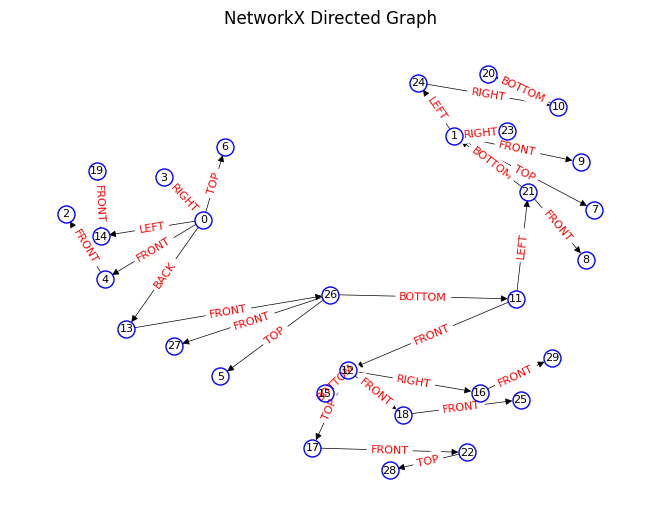

In [4]:

# "Type" probability space
type_probability_space = RNG.random(
    size=(num_modules, NUM_OF_TYPES_OF_MODULES),
    dtype=np.float32,
)

# "Connection" probability space
conn_probability_space = RNG.random(
    size=(num_modules, num_modules, NUM_OF_FACES),
    dtype=np.float32,
)

# "Rotation" probability space
rotation_probability_space = RNG.random(
    size=(num_modules, NUM_OF_ROTATIONS),
    dtype=np.float32,
)

# Decode the high-probability graph
hpd = HighProbabilityDecoder(num_modules)
graph = hpd.probability_matrices_to_graph(
    type_probability_space,
    conn_probability_space,
    rotation_probability_space,
)

# Visualize the graph
draw_graph(graph)

[17:57:19] DoF (model.nv): 17, Actuators (model.nu): 11                                            ]8;id=993396;file:///var/folders/x7/1fxq57_x2d1c5hmfwj4l43cw0000gp/T/ipykernel_42623/2129664505.py\2129664505.py]8;;\:]8;id=483364;file:///var/folders/x7/1fxq57_x2d1c5hmfwj4l43cw0000gp/T/ipykernel_42623/2129664505.py#19\19]8;;\

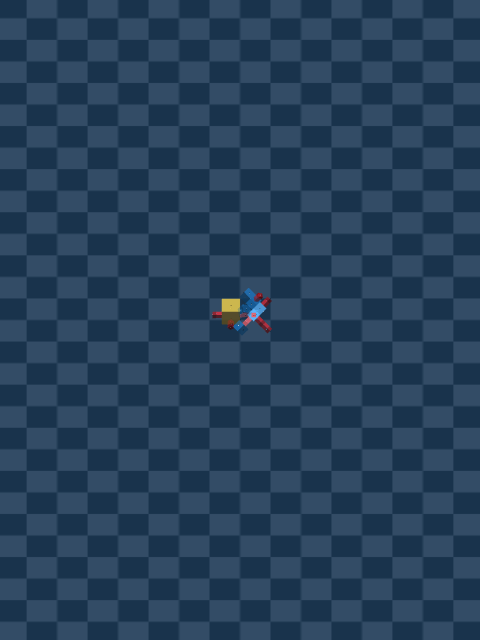

In [5]:
# Build the robot from the graph
core = construct_mjspec_from_graph(graph)

# MuJoCo basics
world = SimpleFlatWorld()

# Set random colors for geoms
for i in range(len(core.spec.geoms)):
    core.spec.geoms[i].rgba[-1] = 0.5

# Spawn the robot at the world
world.spawn(core.spec)

# Compile the model
model = world.spec.compile()
data = mj.MjData(model)

# Number of actuators and DoFs
console.log(f"DoF (model.nv): {model.nv}, Actuators (model.nu): {model.nu}")

# Reset state and time of simulation
mj.mj_resetData(model, data)

# Render
single_frame_renderer(model, data, steps=10)